# Analysis of COVID-19 progression in Great Britain


> Visualisation of changes in COVID-19 prevalence in Great Britain

- toc: true
- branch: master
- hide: false
- search_exclude: false
- badges: true
- comments: false
- author: Alexandre Payot
- categories: [Visualisation, Data, Covid]

The aim of this blog post is to show the evolution of COVID numbers in a way that captures the global behaviour of the epidemic and lets us answer key questions like:

* Are the current measures working?
* Is the epidemic accelerating or slowing down?

Far from sentionalist headlines or opinions dismissing SARS-CoV-2 as just another flu, we try to extract reliable patterns from the sometimes erratic data which comes of stretched health and testing systems.

This project was started in April 2020, analysing the data for France as part of [data against covid19](https://opencovid19-fr.github.io/) citizen's initiative. I aim to keep updating the data in this article every week along with the commentary of the dynamic of the epidemic.

In [1]:
#hide
%load_ext autoreload
%autoreload 2

In [2]:
#collapse-hide
import pandas as pd
import numpy as np
from uk_covid19 import Cov19API
import datetime
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

You can find and inspect the code used for visualisation at the following address: [payoto/covid19-viz](https://github.com/payoto/covid19-viz).

In [3]:
import viz

In [4]:
# hide
display(Markdown("Article updated on {}".format(datetime.date.today().strftime("%d/%m/%Y"))))

Article updated on 06/01/2021

## Updates

### 06/01/2020

All indicators show the prevalence of each state of the disease is increasing at 5% per day (doubling time of 2 weeks).

## Data access

For this analysis, the [government's API for COVID-19 data](https://coronavirus.data.gov.uk/details/developers-guide#structure-metrics) is used to access data, as installed from [pypi](https://pypi.org/project/uk-covid19/).

In [47]:
all_nations = [
    "areaType=nation"
]
cases_and_deaths = {
    "date": "date",
    "maille_code": "areaName",
    "cas_confirmes": "cumCasesBySpecimenDate",
    # prefer publish date for deaths as the reporting lag gives a false impression of improvement
    "deces":"cumDeaths28DaysByPublishDate",  
    "reanimation": "covidOccupiedMVBeds",
    "hospitalises": "hospitalCases"
}

api = Cov19API(
    filters=all_nations,
    structure={c : c for c in cases_and_deaths.values()}
)
df = api.get_dataframe()
df = df.rename(
    {v : k for k, v in cases_and_deaths.items()},
    axis="columns"
)
df = df.iloc[::-1]

Our analysis is based on my previous visualisation of French data, in that respect we get it in the same format.

In [48]:
df = viz.enable_time_series_plot(
    df, timein_field="date", timeseries_field_out="t"
)
df["source_nom"] = "PHE"
df["maille_nom"] = df["maille_code"]

## Latest data for England

In this section we look at the processed data for England.
In the first plot on the left the raw data is presented, then the data smoothed over is smoothed using a moving average over 7 days. On the right the number on the vertical axis is the daily change as a proportion of the total.

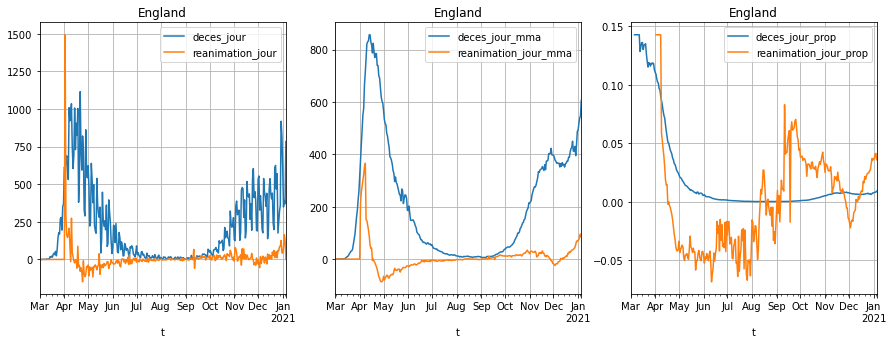

In [49]:
#collapse-hide

maille_active = 'England'
data = viz.oc19_data_preproc(
    df, maille_active,
    rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
    no_negatives=["deces"],
)

In [50]:
data.tail()

deces  reanimation  hospitalises  cas_confirmes  \
t                                                               
2021-01-01  64731.0       1940.0       22534.0      2312853.0   
2021-01-02  65080.0       2017.0       23557.0      2360492.0   
2021-01-03  65472.0       2181.0       24957.0      2390195.0   
2021-01-04  65842.0       2310.0       26626.0      2394923.0   
2021-01-05  66626.0       2310.0       26626.0      2394923.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2021-01-01           219387.0           2122097.0       613.0   
2021-01-02           221404.0           2145654.0       349.0   
2021-01-03           223585.0           2170611.0       392.0   
2021-01-04           225895.0           2197237.0       370.0   
2021-01-05           228205.0           2223863.0       784.0   

            deces_jour_jour  reanimation_jour  reanimation_jour_jour  ...  \
t                                                                     ...   
2021-01-01           -207.0              41.0                   -4.0  ...   
2021-01-02           -264.0              77.0                   36.0  ...   
2021-01-03             43.0             164.0                   87.0  ...   
2021-01-04            -22.0             129.0                  -35.0  ...   
2021-01-05            414.0               0.0                 -129.0  ...   

            reanimation_solde_vivant_jour_jour_mma  deces_jour_mma_jour  \
t                                                                         
2021-01-01                               10.571429             6.142857   
2021-01-02                               27.142857            24.857143   
2021-01-03                               36.000000            20.857143   
2021-01-04                               13.142857             6.857143   
2021-01-05                               48.142857            60.571429   

            deces_jour_prop  reanimation_jour_prop  hospitalises_jour_prop  \
t                                                                            
2021-01-01         0.007625               0.037040                0.030639   
2021-01-02         0.007966               0.036759                0.031577   
2021-01-03         0.008237               0.040938                0.032513   
2021-01-04         0.008295               0.041373                0.033265   
2021-01-05         0.009106               0.035993                0.025963   

            cas_confirmes_jour_prop  reanimation_cumul_jour_prop  \
t                                                                  
2021-01-01                 0.019890                     0.007890   
2021-01-02                 0.020154                     0.008153   
2021-01-03                 0.019145                     0.008472   
2021-01-04                 0.017014                     0.008809   
2021-01-05                 0.012710                     0.009084   

            hospitalises_cumul_jour_prop  reanimation_solde_vivant_jour_prop  \
t                                                                              
2021-01-01                      0.009951                            0.291458   
2021-01-02                      0.010188                            0.293789   
2021-01-03                      0.010445                            0.288203   
2021-01-04                      0.010721                            0.277798   
2021-01-05                      0.010904                            0.298639   

            deces_jour_mma_jour_prop  
t                                     
2021-01-01                  0.012446  
2021-01-02                  0.047947  
2021-01-03                  0.038675  
2021-01-04                  0.012556  
2021-01-05                  0.099835  

[5 rows x 43 columns]

In [51]:
#collapse-hide
def plots_maille_code(maille_active='England', **kwargs):
    fra = viz.oc19_data_preproc(
        df, maille_active,
        rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
        no_negatives=["deces"],
    )
    plt.close()
    # plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    viz.plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active, **kwargs)
    viz.plot_field_loops(fra, "deces", center=True, maille_active=maille_active, **kwargs)
    # if maille_active == "FRA":
    plt.show()
    display(Markdown(
        f"For {maille_active} the number of cases can be analysed. Contrary to to other quantities"
        + " the number of cases is avareged over 14 days with a triangular window."
    ))
    viz.plot_field_loops(
        fra, "cas_confirmes", [14], center=True, maille_active=maille_active,
        win_type='triang', **kwargs
    )
    return fra

The next analysis we look at are trend lines with 

In [52]:
_ = plots_maille_code(maille_active='England')

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x0000011C955C8AF0>
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\envs\covid19-viz\lib\weakref.py", line 54, in _cb
    self = self_wr()
KeyboardInterrupt: 


KeyboardInterrupt: 

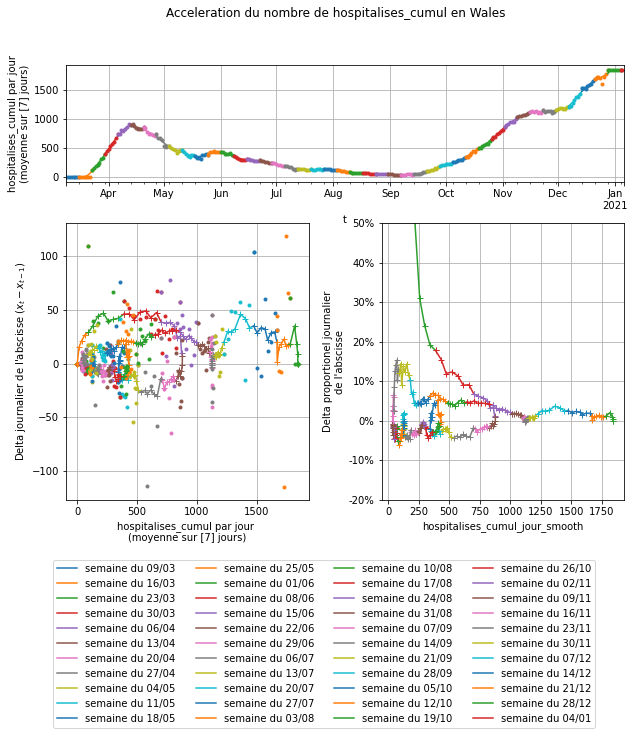

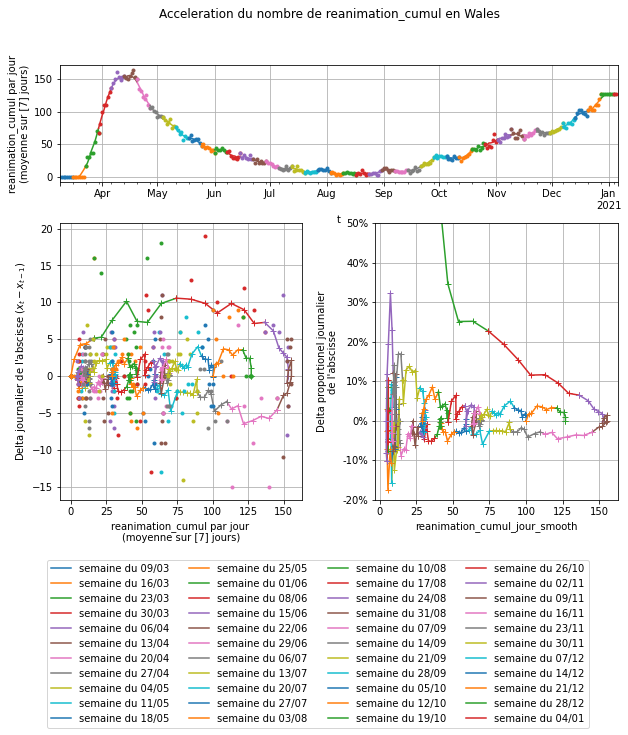

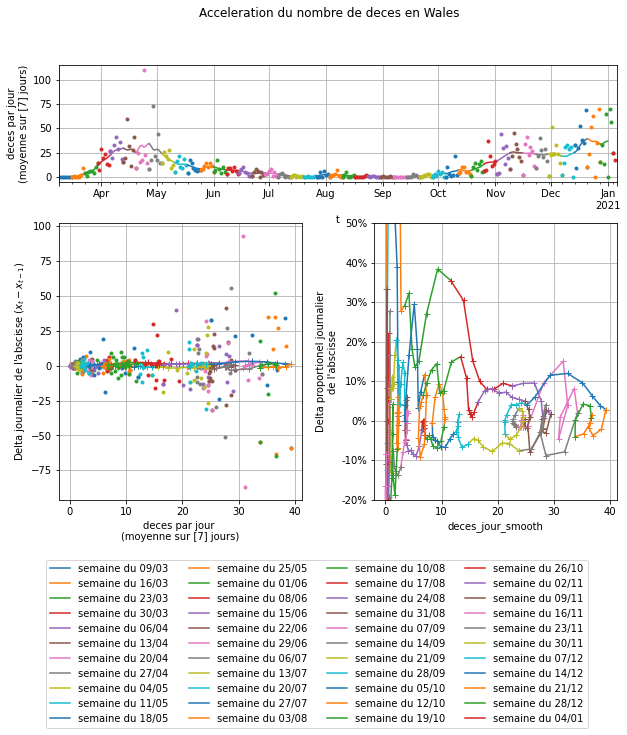

For Wales the number of cases can be analysed. Contrary to to other quantities the number of cases is avareged over 14 days with a triangular window.

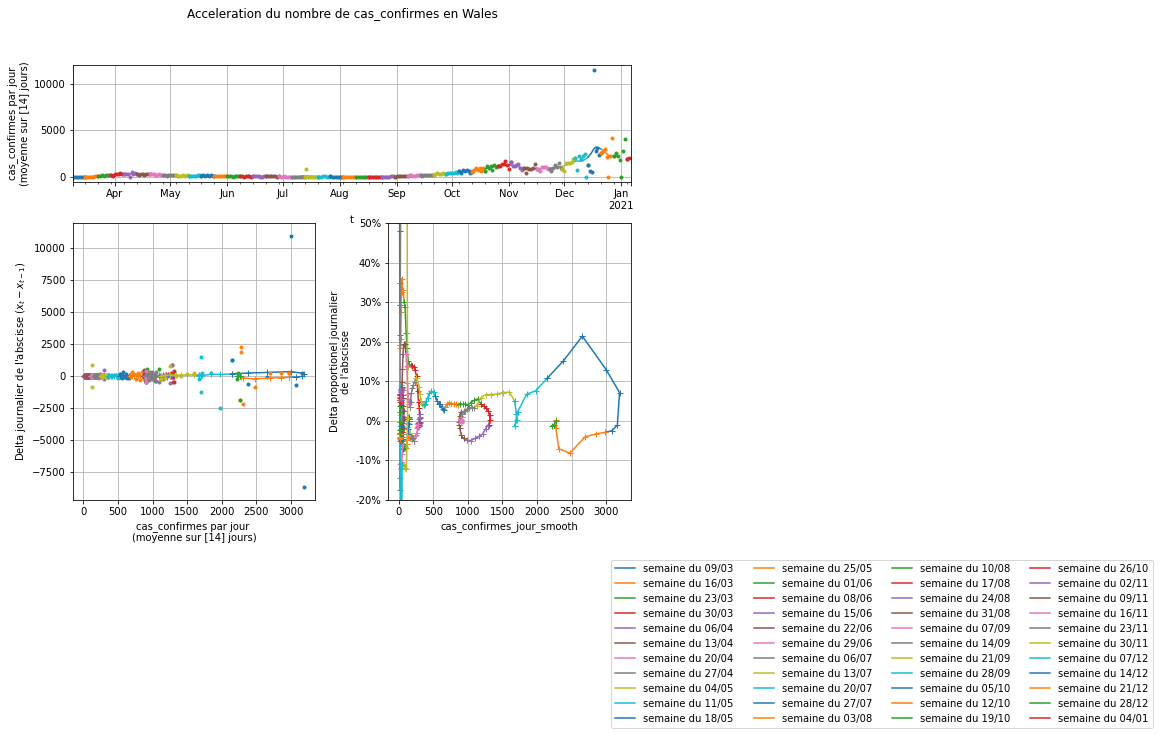

In [20]:
_ = plots_maille_code(maille_active='Wales')

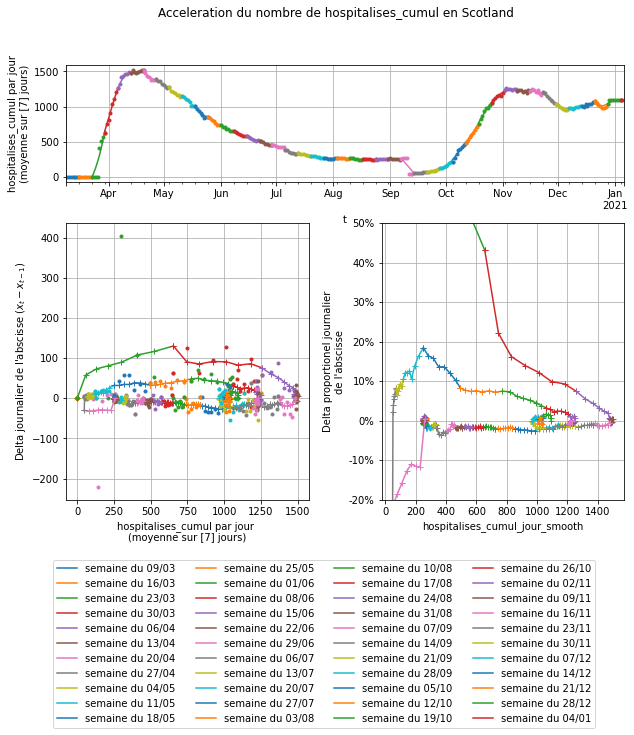

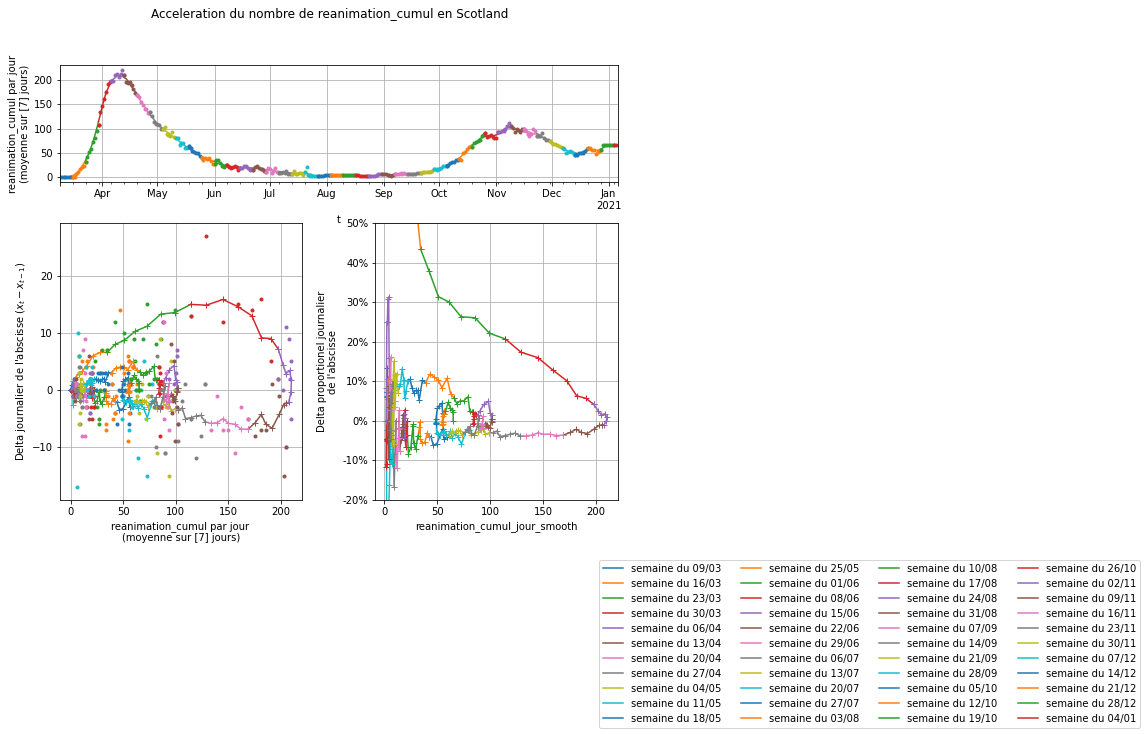

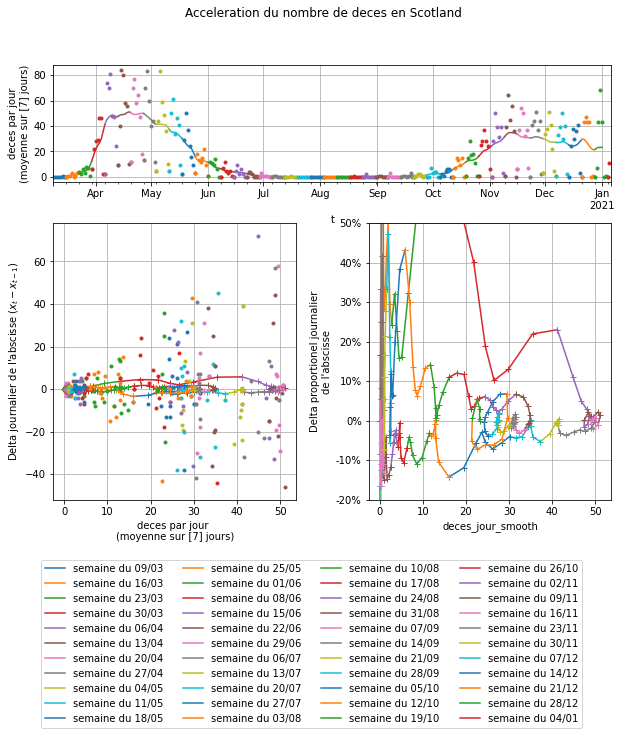

For Scotland the number of cases can be analysed. Contrary to to other quantities the number of cases is avareged over 14 days with a triangular window.

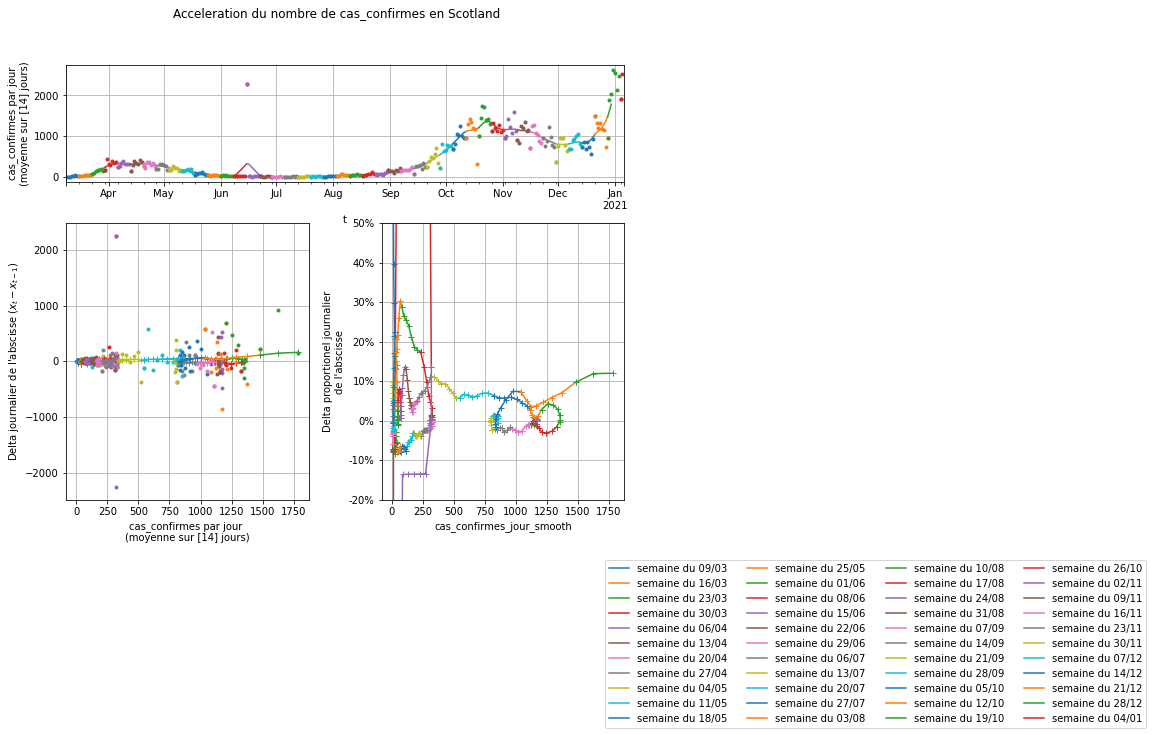

In [21]:
_ = plots_maille_code(maille_active='Scotland')

In [55]:
fra, _ = viz.oc19_data_preparation(
    df, maille_active,
    rows=["t", "deces", "reanimation", "hospitalises", "cas_confirmes"],
    no_negatives=["deces"],

)

fra = fra.loc["2020-07-15" < fra.index, :].iloc[:-3,:]

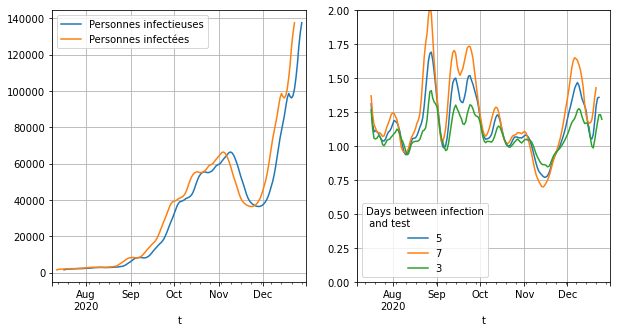

In [60]:
#collapse-hide
infectious_period_around_test = [-2, 1]
infect_to_test_base = -5

windowing = dict(window=7, center=True)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
for offset in [0, -2, 2]:
    infect_to_test = infect_to_test_base + offset
    infectieux = viz.state_tracking(
        fra["cas_confirmes_jour"], 
        *infectious_period_around_test
    ).rolling(**windowing).mean()
    infectes = viz.state_tracking(
        fra["cas_confirmes_jour"], 
        *[i+infect_to_test for i in infectious_period_around_test]
    ).rolling(**windowing).mean()
    if offset == 0:
        infectieux.plot(ax = axs[0], label="Personnes infectieuses")
        infectes.plot(ax = axs[0], label="Personnes infectées")
    R = infectes / infectieux
    R.plot(ax=axs[1], label=f"{-infect_to_test}")
axs[0].legend()
axs[1].legend().set_title("Days between infection\n and test")
axs[1].set_ylim((0,2))
for ax in axs:
    ax.grid("on")